In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("/Users/ChandlerShortlidge/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [4]:
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)

display(frequency_table)
frequency_table.head(5) 
display(proportion_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

*Top 5 product categories are Sports & Outdoors; Beauty; Handmade Clothing, Shoes & Accessories; Bath & Body; and Birthday Gifts*

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*


/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_23895/3521792655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=top_cats.index, palette="viridis")


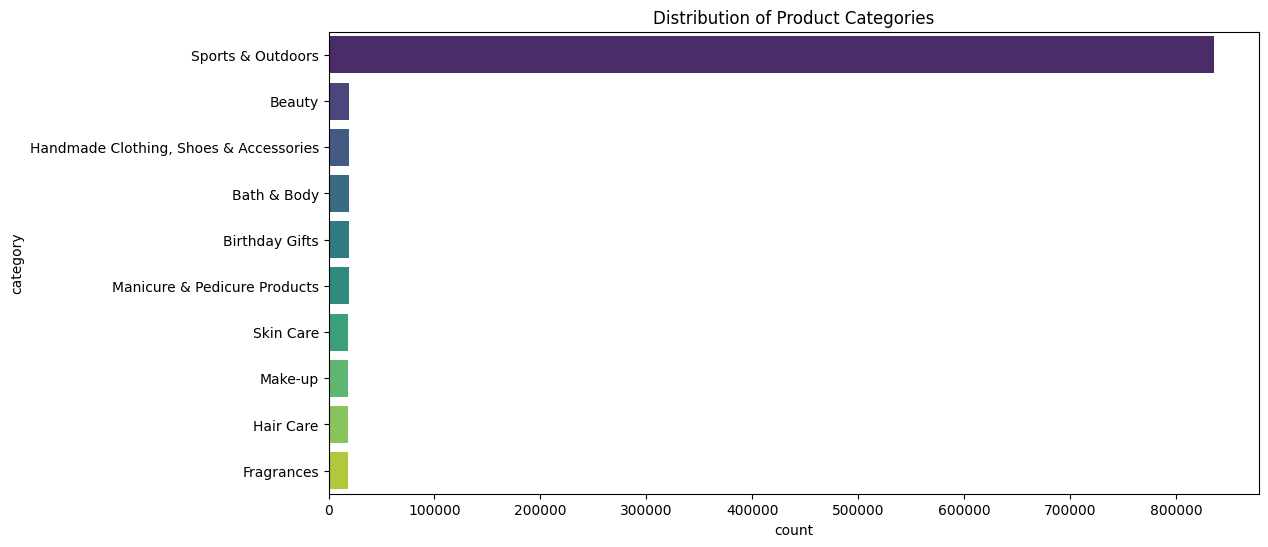

In [5]:

top_cats = frequency_table.head(10) 

# Bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=top_cats.index, palette="viridis")
plt.title('Distribution of Product Categories')
plt.show()

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_23895/2574313031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Set3")


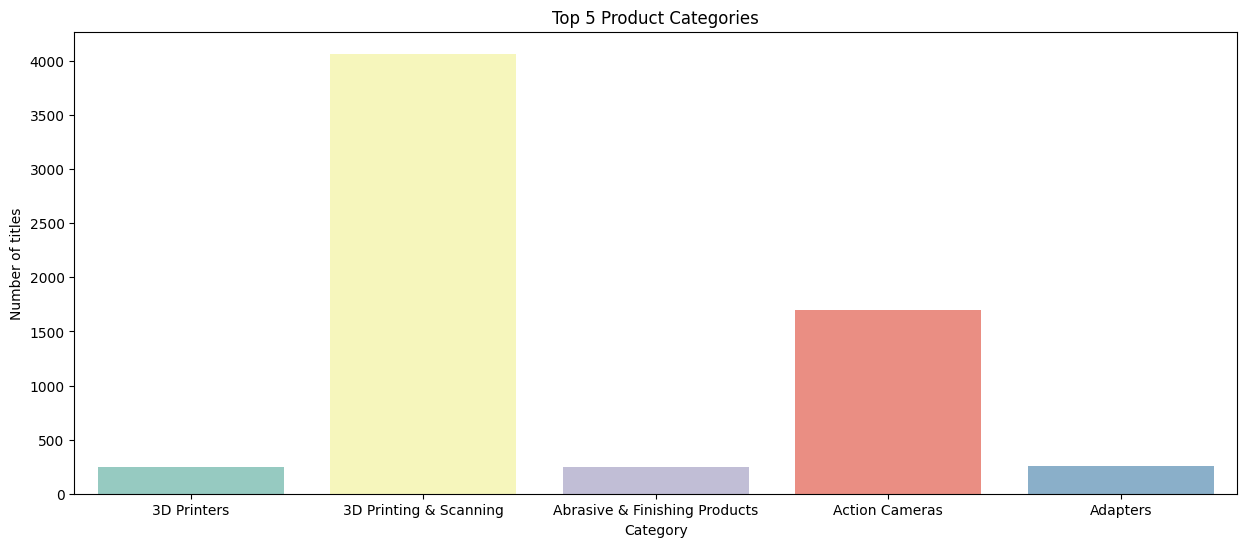

In [6]:
top_products = df.groupby('category')['title'].count().head()
top_products


plt.figure(figsize=(15, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Set3")
plt.title("Top 5 Product Categories")
plt.ylabel("Number of titles")
plt.xlabel("Category")
plt.show()


  - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

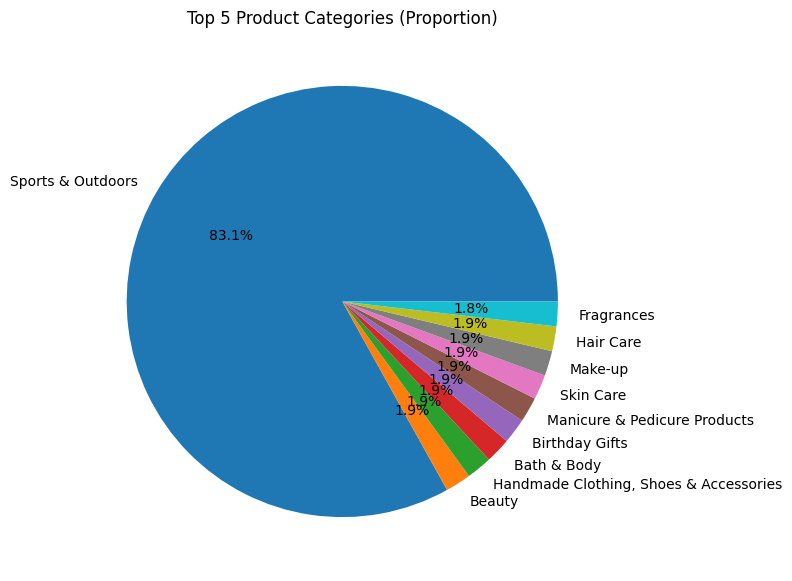

In [7]:
# Pie chart
top_cats.plot.pie(
    autopct='%1.1f%%',     # Show percent v
    ylabel='',             # Remove y-label for a cleaner plot
    figsize=(7, 7)         
)
plt.title("Top 5 Product Categories (Proportion)")
plt.show()


*Sports & Outdoors dominates the listings*

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [10]:
mean_val = df["price"].mean()
median_val = df["price"].median()
mode_val = df["price"].mode()[0]  

print("Mean Price:", mean_val.round(2))
print()

print("Median Price:", median_val.round(2))
print()

print("Mode Price:", mode_val.round(2))
print()

Mean Price: 89.24

Median Price: 19.09

Mode Price: 9.99



*The average (mean) price point is 89.24, which is much higher than the average price of 9.99*

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [11]:
print("Variance:")
print(df.price.var())

print("Standard Deviation:")
print(df.price.std())

min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
print("Range of prices:", range_price)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range:", IQR)


Variance:
119445.48532254907
Standard Deviation:
345.60886175349884
Range of prices: 100000.0
Interquartile Range: 36.0


*Product prices are highly varied.*

*The range of prices is 100,000, showing the difference between the cheapest and most expensive products is extremely large. However, the min is 0.00, which is not a real price, so the data should probably be cleaned to remove those prices in order to get a more accurate result.*

*The standard deviation (~346) and variance (~119,445) indicate a substantial average spread from the mean price.*

*The IQR tells us that the middle 50% of product prices fall within a $36 range. Since this is much smaller than the total range ($100,000), most prices are close together, and only a few extreme outliers account for the largest differences in price.*

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

<Axes: xlabel='price', ylabel='Count'>

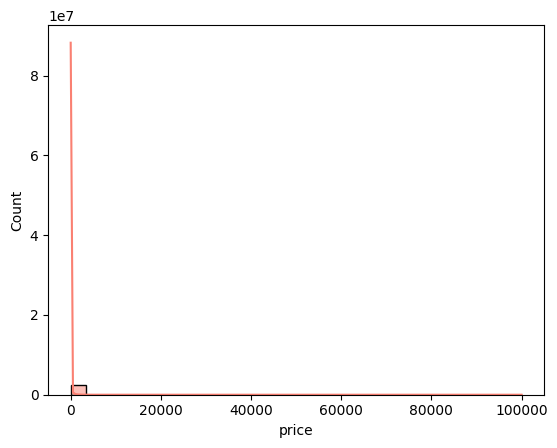

In [12]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

*In order to more easily read the histogram, we should probably remove the $100,000 outlier from our dataset.*

<Axes: ylabel='price'>

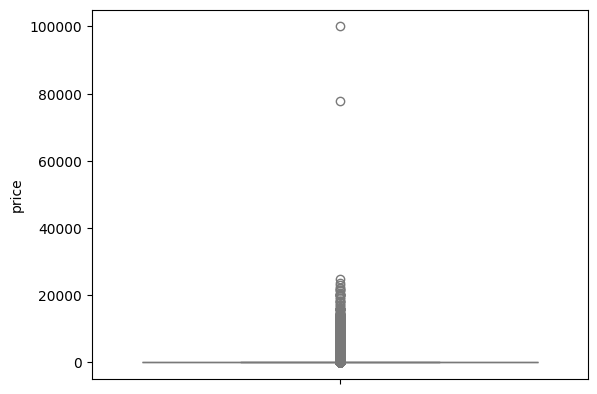

In [13]:
sns.boxplot(data = df['price'], color="lightblue", whis=1.5)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?


In [24]:
df.stars.describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [21]:
mean_rating = df["stars"].mean()
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()[0]  

print("Mean Rating:", mean_rating)
print()

print("Median Rating:", median_rating)
print()

print("Mode Rating:", mode_rating)
print()

Mean Rating: 2.152836472966065

Median Rating: 0.0

Mode Rating: 0.0



*Customers either do not rate products, resulting in a score of 0.0, or if they do, they tend rate products 2.5 stars out of 5 stars.*

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [23]:
print("Variance:")
print(df.stars.var())

print("Standard Deviation:")
print(df.stars.std())

Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range:", IQR)

Variance:
4.817434029796862
Standard Deviation:
2.1948653785134207
Interquartile Range: 4.4


*The variance (4.8), standard deviation (2.2), and interquartile range (4.4) are all very large relative to the 0–5 scale, meaning customer ratings are highly varied and not consistent at all. Customers gave both very low and very high ratings, with the typical rating range spanning almost the whole scale.*


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?
